In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('LC_chosen_columns.csv')

In [3]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   loan_amnt             float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   emp_title             object 
 8   emp_length            object 
 9   home_ownership        object 
 10  annual_inc            float64
 11  verification_status   object 
 12  issue_d               object 
 13  loan_status           object 
 14  purpose               object 
 15  title                 object 
 16  zip_code              object 
 17  addr_state            object 
 18  dti                   float64
 19  earliest_cr_line      object 
 20  open_acc              float64
 21  pub_rec               float64
 22  revol_bal             float64
 23  revol_u

In [5]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [6]:
df = df[(df['loan_status'] == 'Fully Paid' )| (df['loan_status'] == 'Charged Off' )]

Text(0.5, 1.0, 'Fully Paid vs Charged Off')

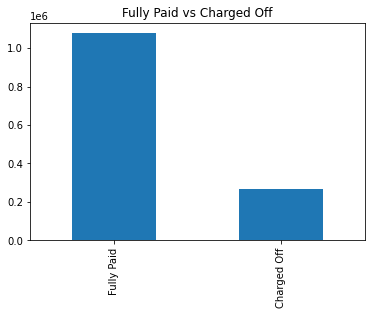

In [7]:
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Fully Paid vs Charged Off')

<AxesSubplot:>

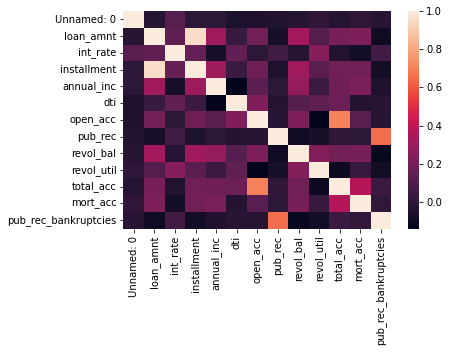

In [8]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='installment', ylabel='Count'>

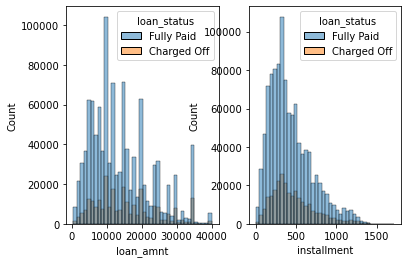

In [9]:
#df[['loan_amnt','installment','loan_status']].groupby('loan_status').hist()
plt.subplot(1,2,1)
sns.histplot(df, x = 'loan_amnt', hue = 'loan_status', bins = 40)
plt.subplot(1, 2, 2)
sns.histplot(df, x = 'installment', hue = 'loan_status', bins = 40)

In [10]:
df.isna().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16659
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

In [11]:
df['loan_amnt'].sort_values(ascending= False)

2254946    40000.0
948385     40000.0
1940646    40000.0
813865     40000.0
2088190    40000.0
            ...   
1651223      500.0
1651345      500.0
1651321      500.0
1650811      500.0
1651492      500.0
Name: loan_amnt, Length: 1345310, dtype: float64

/Users/liya_mulugeta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

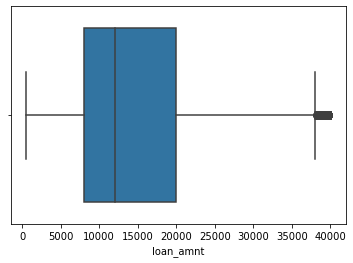

In [12]:
sns.boxplot(df['loan_amnt'])

## Feature Selection

We are dropping categorical variables that have more than 20 distinct values in order to not overfit the final model. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1345310 non-null  int64  
 1   loan_amnt             1345310 non-null  float64
 2   term                  1345310 non-null  object 
 3   int_rate              1345310 non-null  float64
 4   installment           1345310 non-null  float64
 5   grade                 1345310 non-null  object 
 6   sub_grade             1345310 non-null  object 
 7   emp_title             1259525 non-null  object 
 8   emp_length            1266799 non-null  object 
 9   home_ownership        1345310 non-null  object 
 10  annual_inc            1345310 non-null  float64
 11  verification_status   1345310 non-null  object 
 12  issue_d               1345310 non-null  object 
 13  loan_status           1345310 non-null  object 
 14  purpose               1345310 non-

'Unnamed: 0' is not an important feature since it is only here to index the data. Beside, 'sub_grade' is giving more information that 'grade' so we can drop the feature 'grade'.

In [14]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
df.drop('grade', axis = 1, inplace = True)

In [16]:
df.drop('installment', axis = 1, inplace = True)

<AxesSubplot:>

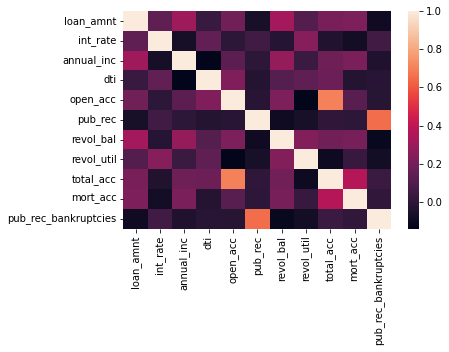

In [17]:
sns.heatmap(df.corr())

In [18]:
for i, col in enumerate([column for column in df.columns if df[column].dtype == object]):
    if df[col].nunique() > 40:
        df.drop(col, axis = 1, inplace = True)

In [19]:
for i, col in enumerate([column for column in df.columns if df[column].dtype == object]):
    print(col,'has ', df[col].nunique(),' distinct values')

term has  2  distinct values
sub_grade has  35  distinct values
emp_length has  11  distinct values
home_ownership has  6  distinct values
verification_status has  3  distinct values
loan_status has  2  distinct values
purpose has  14  distinct values
initial_list_status has  2  distinct values
application_type has  2  distinct values


In [20]:
df.drop('sub_grade', axis = 1, inplace = True)

In [21]:
df.drop('initial_list_status', axis = 1, inplace = True)

Let's drop all the rows with missing values.

In [22]:
df.dropna(inplace = True)

In [23]:
df.shape

(1220092, 18)

/Users/liya_mulugeta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

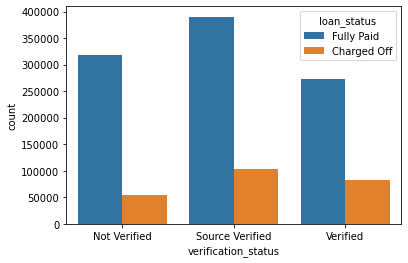

In [24]:
sns.countplot(df['verification_status'], hue = df['loan_status'])

## Categorical variables

Now, let's create dummy variables with the remaining categorical variables. 

In [25]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year'],
      dtype=object)

In [26]:
len_val = {'10+ years':10, '2 years': 2, '3 years': 3, 
          '< 1 year': 0.5, '1 year': 1, '5 years': 5,
          '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}

df['emp_length'] = df.emp_length.map(len_val)

In [27]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [28]:
print([column for column in df.columns if df[column].dtype == object])

['home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type']


## Values of each categorical column

In [29]:
df['term'].unique()

array([36, 60])

In [30]:
df['emp_length'].unique()

array([10. ,  3. ,  4. ,  6. ,  7. ,  8. ,  2. ,  5. ,  9. ,  0.5,  1. ])

In [31]:
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [32]:
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'car',
       'medical', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [33]:
df['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [34]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

## For the model 

In [35]:
dummies = (
    ['home_ownership', 'verification_status', 'purpose', 'application_type']
)

In [36]:
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [37]:
df.shape

(1220092, 35)

In [38]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_Joint App'],
      dtype='object')

In [39]:
df['dti']

0           5.91
1          16.06
2          10.78
4          25.37
5          10.20
           ...  
2260688    20.59
2260690    22.03
2260691    10.34
2260692    12.25
2260697    18.30
Name: dti, Length: 1220092, dtype: float64

In [40]:
# df['verification_status'].value_counts()

## Question where the user should type a number

In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220092 entries, 0 to 2260697
Data columns (total 35 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   loan_amnt                            1220092 non-null  float64
 1   term                                 1220092 non-null  int64  
 2   int_rate                             1220092 non-null  float64
 3   emp_length                           1220092 non-null  float64
 4   annual_inc                           1220092 non-null  float64
 5   loan_status                          1220092 non-null  object 
 6   dti                                  1220092 non-null  float64
 7   open_acc                             1220092 non-null  float64
 8   pub_rec                              1220092 non-null  float64
 9   revol_bal                            1220092 non-null  float64
 10  revol_util                           1220092 non-null  float64
 11

In [42]:
df.drop('purpose_small_business', axis=1, inplace = True)
df = df.rename(columns={'verification_status_Source Verified': 'verification_status_Source_Verified',
              'application_type_Joint App': 'application_type_Joint_App'})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220092 entries, 0 to 2260697
Data columns (total 34 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   loan_amnt                            1220092 non-null  float64
 1   term                                 1220092 non-null  int64  
 2   int_rate                             1220092 non-null  float64
 3   emp_length                           1220092 non-null  float64
 4   annual_inc                           1220092 non-null  float64
 5   loan_status                          1220092 non-null  object 
 6   dti                                  1220092 non-null  float64
 7   open_acc                             1220092 non-null  float64
 8   pub_rec                              1220092 non-null  float64
 9   revol_bal                            1220092 non-null  float64
 10  revol_util                           1220092 non-null  float64
 11

/Users/liya_mulugeta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

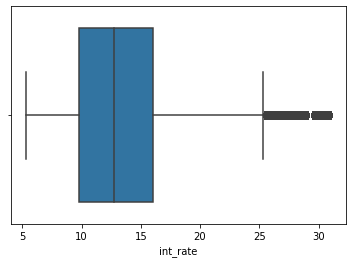

In [44]:
sns.boxplot(df['int_rate'])

The output should be numerical so we need to map a binary outcome as following:

In [45]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [46]:
loan = {'Fully Paid': 1, 'Charged Off': 0}
df['loan_status'] = df.loan_status.map(loan)
df['loan_status']

0          1
1          1
2          1
4          1
5          1
          ..
2260688    1
2260690    1
2260691    0
2260692    1
2260697    0
Name: loan_status, Length: 1220092, dtype: int64

## Split train/test sets

Now we can begin the machine learning models. First, we need to split the training and testing set. 

In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)


from sklearn.ensemble import RandomForestClassifier


It is important to check if the dataset is balanced or not in order to know what kind of metrics are we going to use to assess the models.

In [48]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19725807562052697
Weight of negative values 0.802741924379473


In [49]:
import random

random.seed()

train, test = train_test_split(df, test_size=0.3, random_state=42)

print(train.shape)
print(test.shape)

(854064, 34)
(366028, 34)


In [50]:
train.loan_status.value_counts()[1] / df.shape[0]

0.5619182815722094

## Removing outiliers

Outliers on the training set could really negatively impact our model since it could create biais. We are going to deal with them in the following cells:

/Users/liya_mulugeta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

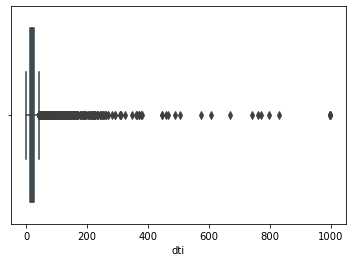

In [51]:
sns.boxplot(train['dti'])

In [52]:
train['dti'].describe()

count    854064.00000
mean         18.30222
std           9.60013
min          -1.00000
25%          11.91000
50%          17.68000
75%          24.13000
max         999.00000
Name: dti, dtype: float64

From above, we can see that the variable 'dti' has a lot of outliers. We could remove all the values that are above 50. 

We can do the same kind of work on the remaining numerical variables and we can remove their respectively ouliers. Finally, we can keep the following values:

In [53]:
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]

Then we split the training and testing set from the target variable.

In [54]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [55]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source_Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_vacation', 'purpose_wedding',
       'application_type_Joint_App'],
      dtype='object')

In [56]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

## Models

### Logistic 

The first model that we implement is the logistic regression: 

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=88)

In [58]:
## build the confusion matrix
y_prob = logreg.predict_proba(X_test)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

cm = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix: \n", cm)
print ("\nPrecision:", precision_score(y_test, y_pred_log))
print ("\nF1:", f1_score(y_test, y_pred_log))
print ("\nauc:", roc_auc_score(y_test, y_pred_log))
print ("\nrecall:", recall_score(y_test, y_pred_log))

Confusion Matrix: 
 [[   730  71471]
 [  1075 292752]]

Precision: 0.8037713159245846

F1: 0.8897560975609755

auc: 0.5032260239217152

recall: 0.9963413845562185


Since the dataset is imbalanced, we should focus on F1 score. We obtain a good score with this model.

### Random Forest

We could also use Random Forest to try to get a better F1 score.

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
X_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source_Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_vacation', 'purpose_wedding',
       'application_type_Joint_App'],
      dtype='object')

In [61]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nPrecision:", precision_score(y_test, y_pred))
print ("\nF1:", f1_score(y_test, y_pred))
print ("\nauc:", roc_auc_score(y_test, y_pred))
print ("\nrecall:", recall_score(y_test, y_pred))

Confusion Matrix: 
 [[  5774  66427]
 [  5377 288450]]

Precision: 0.8128168351287911

F1: 0.8893116120757696

auc: 0.5308356537947143

recall: 0.9817001160546852


In [62]:
X_test.iloc[0:1]

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_vacation,purpose_wedding,application_type_Joint_App
1191364,28000.0,36.0,8.39,5.0,165000.0,15.07,8.0,1.0,13960.0,54.299999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
y_pred = rf.predict(X_test.iloc[0:1])
y_pred[0]

1.0

In [64]:
y_pred_2 = rf.predict(X_test[0:1].to_numpy())
X_test[0:1].to_numpy()


array([[2.800e+04, 3.600e+01, 8.390e+00, 5.000e+00, 1.650e+05, 1.507e+01,
        8.000e+00, 1.000e+00, 1.396e+04, 5.430e+01, 2.400e+01, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]], dtype=float32)

In [65]:
# server_SCAE6EQZV44GQQDOHHRWAEKH-T7YWF3TP2TTKBYLG
import anvil.server

anvil.server.connect("server_SCAE6EQZV44GQQDOHHRWAEKH-T7YWF3TP2TTKBYLG")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER


In [66]:
@anvil.server.callable
def predict_status(microloans_row):
    y_pred = rf.predict(microloans_row)
    return y_pred[0]